# Mid-Term Project 

The following code provides the entire exploratoratory data analysis, metrics, training and selecting the best models, exporting the models from the jupyter notebook and deploying the service tothe cloud

-------- Problem Statement ------

Amazon has data on the 50 best sellers from 2009 to 2019. The company would like to have more insights about their customers through data visualizations and a model to predict user rating of a book. Amazon hopes to build a simple model that will help inform about customer behaviour through the rating of these best sellers.

The first step is to import libraries that will be commonly used at all sections of our analyses

In [76]:
#import pandas as pd and numpy as np

In [77]:
import pandas as pd
import numpy as np

In [78]:
#import matlab and seaborn plotting libraries, activate inline plotting using %inline

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [80]:
#Source of the data on kaggle, more information can be obtained from this link: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [81]:
#Use pandas to read 'csv' file of the data and store it to a variable called 'df'

In [82]:
df = pd.read_csv('data_kaggle.csv')

In [83]:
##Exploratory Data Analysis

In [84]:
#inspect headers and rows of the data

In [85]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [86]:
#inspect the data types for each column  

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Before we can use our data, its important to have column names of similar form, remove spaces in headers and check data for spaces and special characters that may hinder accessing the data or hinder analysis

In [88]:
#change all headers to lower case and replace spaces with '_'

In [89]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [90]:
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [91]:
#identify data of type object and change the entries to lower case, replace spaces with '_'

In [92]:
df.dtypes == 'object'

name            True
author          True
user_rating    False
reviews        False
price          False
year           False
genre           True
dtype: bool

In [93]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [94]:
#Check the data for null entries

In [95]:
df.describe()

,user_rating,reviews,price,year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [96]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

The data has 4 columns of numeric values and 3 columns of categorical type. 
Data has no missing values

In [97]:
#install and use missingno library to visualize missing data

In [98]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [99]:
import missingno

/home/zach/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/zach/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

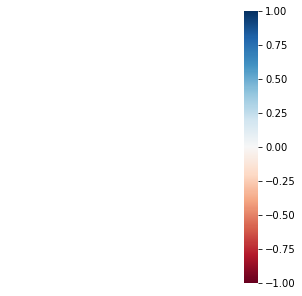

In [100]:
missingno.heatmap(df, figsize=(5,5), fontsize=12 )

<AxesSubplot:>

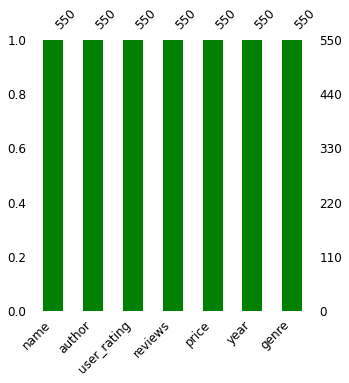

In [101]:
missingno.bar(df, color='g', figsize=(5,5), fontsize=12 )

Conclusion: There are no missing values in our dataframe

In [102]:
#Check for duplicates in categorical columns

In [103]:
data_type_cat_col = list(df.select_dtypes(exclude=('int64', 'float64')).columns)

In [104]:
data_type_cat_col

['name', 'author', 'genre']

In [105]:
print(f"Columns with categorical entries: {', '.join(data_type_cat_col)}.")

Columns with categorical entries: name, author, genre.


In [106]:
#loop through data_type_cat_col to check for duplicates in each column

In [107]:
for col in data_type_cat_col:
    if df[col].duplicated().any() == True:
        print(f'{col} column contains duplicates.')
    else:
        print(f'{col} column has no duplicates.')

name column contains duplicates.
author column contains duplicates.
genre column contains duplicates.


categorical columns have duplicates, check for words in different cases or extra spaces 

In [108]:
#loop through each categorical column for typos

In [109]:
for col in data_type_cat_col:
    print(f'Current count of {col} entries: {len(set(df[col]))} <-----> Crosschecking {col} entries: {len(set(df[col].str.title().str.strip()))}')

Current count of name entries: 351 <-----> Crosschecking name entries: 350
Current count of author entries: 248 <-----> Crosschecking author entries: 248
Current count of genre entries: 2 <-----> Crosschecking genre entries: 2


There are entries with typos in the name column

In [117]:
#correct the typing errors in the Name column

In [119]:
df.name = df.name.str.title().str.strip()

In [120]:
#Cross check if correction has been applied to the name column using previous code

In [121]:
for col in data_type_cat_col:
    print(f'Current count of {col} entries: {len(set(df[col]))} <-----> Crosschecking {col} entries: {len(set(df[col].str.title().str.strip()))}')

Current count of name entries: 350 <-----> Crosschecking name entries: 350
Current count of author entries: 248 <-----> Crosschecking author entries: 248
Current count of genre entries: 2 <-----> Crosschecking genre entries: 2


All entries have been corrected

In [110]:
#Check authors for spelling mistakes and repetitions

In [123]:
#Install fuzzywuzzy library to string match names of repeated authors

In [122]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [124]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/home/zach/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [129]:
process.extract('George R.R. Martin', df.author, limit=5)

[('George R.R. Martin', 100, 118),
 ('George R.R. Martin', 100, 119),
 ('George R.R. Martin', 100, 120),
 ('George R. R. Martin', 97, 5),
 ('George R. R. Martin', 97, 6)]

In [140]:
process.extract('J.K. Rowling', df.author, limit=10)

[('J.K. Rowling', 100, 102),
 ('J.K. Rowling', 100, 153),
 ('J.K. Rowling', 100, 154),
 ('J.K. Rowling', 100, 156),
 ('J.K. Rowling', 100, 157),
 ('J.K. Rowling', 100, 353),
 ('J. K. Rowling', 96, 155),
 ('J. K. Rowling', 96, 159),
 ('Jim Collins', 52, 139),
 ('Jim Collins', 52, 140)]

Author names R.R. Martin and J.K. Rowling are repeated in the column author

In [133]:
#Replace similar names with the correct name

In [141]:
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [143]:
#Cross check entries for any repetitions

In [144]:
for col in data_type_cat_col:
    print(f'Current count of {col} entries: {len(set(df[col]))} <-----> Crosschecking {col} entries: {len(set(df[col].str.title().str.strip()))}')

Current count of name entries: 350 <-----> Crosschecking name entries: 350
Current count of author entries: 246 <-----> Crosschecking author entries: 246
Current count of genre entries: 2 <-----> Crosschecking genre entries: 2


In [147]:
df.author.sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [148]:
#check the genre

In [149]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [150]:
#check the years column

In [152]:
df.year.sort_values().unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [155]:
#finally check entire dataframe

In [154]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Some rows are repeated

In [156]:
#delete year column 

In [158]:
del df['year']

In [159]:
df

,name,author,user_rating,reviews,price,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction


In [161]:
df = df.drop_duplicates(keep = 'first')

In [162]:
df

,name,author,user_rating,reviews,price,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


In [163]:
process.extract('Wonder', df.name, limit=10)

[('Wonder', 100, 540),
 ('The Wonderful Things You Will Be', 90, 486),
 ('Alexander Hamilton', 60, 19),
 ("Balance (Angie'S Extreme Stress Menders)", 60, 29),
 ('Liberty And Tyranny: A Conservative Manifesto', 60, 216),
 ('Strengthsfinder 2.0', 60, 304),
 ('The Pioneer Woman Cooks: Food From My Frontier', 60, 448),
 ('The Sun And Her Flowers', 60, 467),
 ('Under The Dome: A Novel', 60, 520),
 ('The Blood Of Olympus (The Heroes Of Olympus (5))', 57, 343)]

In [164]:
process.extract('The Girl On The', df.name, limit=10)

[('The Girl On The Train', 95, 382),
 ('The Girl On The Train', 95, 383),
 ("A Patriot'S History Of The United States: From Columbus'S Great Discovery To The War On Terror",
  86,
  11),
 ('All The Light We Cannot See', 86, 20),
 ('American Sniper: The Autobiography Of The Most Lethal Sniper In U.S. Military History',
  86,
  23),
 ('And The Mountains Echoed', 86, 24),
 ('Being Mortal: Medicine And What Matters In The End', 86, 34),
 ('Between The World And Me', 86, 35),
 ('Breaking Dawn (The Twilight Saga, Book 4)', 86, 38),
 ('Broke: The Plan To Restore Our Trust, Truth And Treasure', 86, 39)]

Some of the books are repeated, this could be due to the same book being sold at at different price

In [165]:
#Count repeated books in our data

In [168]:
from collections import Counter

In [169]:
repeat_books = Counter(df.name.tolist())

In [172]:
repeat_books.most_common(10)

[('The Help', 3),
 ('Gone Girl', 2),
 ("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2),
 ('The 5 Love Languages: The Secret To Love That Lasts', 2),
 ('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change',
  2),
 ('The Fault In Our Stars', 2),
 ('The Girl On The Train', 2),
 ('The Immortal Life Of Henrietta Lacks', 2),
 ('To Kill A Mockingbird', 2),
 ('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2)]

In [174]:
#Remove duplicates, keep last entry of duplicates

In [175]:
df.drop_duplicates(subset='name', keep='last')

,name,author,user_rating,reviews,price,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


In [176]:
df=df.drop_duplicates(subset='name', keep='last')

In [177]:
df

,name,author,user_rating,reviews,price,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


Lets visualize user ratings 

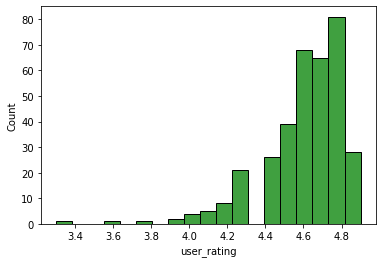

In [190]:
plot = sns.histplot(df, x='user_rating', color= 'g')

From the graph most books receive a high rating(rating > 4). 
A few books have a rating less than 4


Lets answer some questions about our prolifc authors

In [207]:
#Top 10 authors

In [199]:
top_10_authors = df.groupby('author')[['user_rating']].mean().sort_values('user_rating', ascending = False)

In [203]:
top_10_authors=top_10_authors.head(10).reset_index()

In [209]:
top_10_authors

,author,user_rating
0,Nathan W. Pyle,4.9
1,Bill Martin Jr.,4.9
2,Jill Twiss,4.9
3,Rush Limbaugh,4.9
4,Pete Souza,4.9
5,Sarah Young,4.9
6,Lin-Manuel Miranda,4.9
7,Patrick Thorpe,4.9
8,Dav Pilkey,4.9
9,Alice Schertle,4.9


In [208]:
#Number of books written by authors

In [205]:
number_of_books_written = df.groupby('author')[['name']].count().sort_values('name', ascending=False).head(10).reset_index()

In [215]:
number_of_books_written

,author,name
0,Jeff Kinney,12
1,Rick Riordan,10
2,J.K. Rowling,8
3,Stephenie Meyer,7
4,Dav Pilkey,6
5,Bill O'Reilly,6
6,John Grisham,5
7,E L James,5
8,Suzanne Collins,5
9,Charlaine Harris,4


In [216]:
#Number of books in each genre

In [217]:
number_of_books_by_genre = df.groupby('genre')[['name']].count().sort_values('name', ascending=False).head(10).reset_index()

In [218]:
number_of_books_by_genre 

,genre,name
0,Non Fiction,190
1,Fiction,160
